<a href="https://colab.research.google.com/github/hjn14133/STAT/blob/main/Z_score_Confidence_Interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd


In [20]:
#data = pd.read_csv('firetowerFiber_USDA.csv')
data = pd.read_csv('FT_join_file.csv')

In [39]:
feature = data['Unif']

In [40]:
# create 90% confidence interval for feature mean value
st.t.interval(alpha=0.90, df=len(feature)-1, 
              loc=np.mean(feature), scale=st.sem(feature)) 

(80.50811296712905, 80.52349632521401)

In [24]:
# Confidence Interval with Z-statistics

import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import math

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


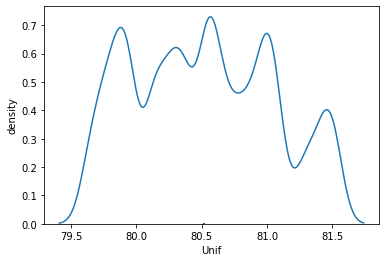

mean:			80.5158
standard deviation:	0.5340
standard error:		0.0047


In [41]:
plt.xlabel('Uniformity')
plt.ylabel('density')
plt.vlines(np.mean(feature),0,0.003)
sns.distplot(feature, hist=False)
plt.show()

#  mean, standard deviation and standard error
mean  = np.mean(feature)           # mean
sigma = statistics.stdev(feature)  # standard deviation
sem   = st.sem(feature)   

print('mean:\t\t\t{:.4f}'.format(mean))
print('standard deviation:\t{:.4f}'.format(sigma))
print('standard error:\t\t{:.4f}'.format(sem))

In [42]:
confidenceLevel = .90
numOfTails      = 2
alpha           = (1 - confidenceLevel)/numOfTails

#  Percent Point Function
#  - calculates z-critical from (1-alpha)
z_critical = st.norm.ppf(1 - alpha)

# confidence Interval formula
lowerCI = mean - (z_critical * sigma)
upperCI = mean + (z_critical * sigma)

print('Step 2a:  Calculate z-critical for Confidence Level {:.0%} with {} tails.'.format(confidenceLevel,numOfTails))
print('Confidence Level:\t{:.0%}'.format(confidenceLevel))
print('Number of Tails:\t{}'.format(numOfTails))
print('alpha:\t\t\t{:.4f}'.format(alpha))
print('z-critical value:\t{:.4f}  <---'.format(z_critical))

print('\nConfidence Interval:\nlower CI\t\t{:.4f}'.format(lowerCI))
print('upper CI:\t\t{:.4f}'.format(upperCI))

Step 2a:  Calculate z-critical for Confidence Level 90% with 2 tails.
Confidence Level:	90%
Number of Tails:	2
alpha:			0.0500
z-critical value:	1.6449  <---

Confidence Interval:
lower CI		79.6374
upper CI:		81.3942


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


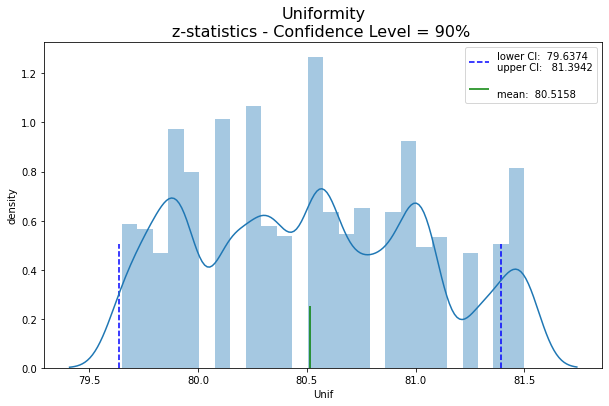

Z-Statistics - CONCLUSION:
90% of the total patients in the Heart Disease UCI dataset will have cholesterol levels between 79 and 82.


In [43]:
usda = 4.24
#  PLOT CONFIDENCE INTERVAL
plt.figure(figsize=(10,6))
plt.title('Uniformity\nz-statistics - Confidence Level = {:.0%} '.format(confidenceLevel), fontsize=16)
plt.xlabel('Uniformity')
plt.ylabel('density')

labelCI=("lower CI:  {:.4f}\nupper CI:   {:.4f}".format(lowerCI,upperCI))
#labelCI=("upper CI: {:.4f}\n".format(upperCI))
#labelUS=("usda: {:.4f}".format(usda))
labelME=("\nmean:  {:.4f}".format(mean))

plt.vlines([lowerCI, upperCI],0,np.mean(st.norm.pdf(feature, loc=mean, scale=sigma)),label=labelCI,color='blue',ls='--')
#plt.vlines([usda],0,np.mean(st.norm.pdf(feature, loc=mean, scale=sigma)),label=labelUS,color='red',ls='--')

plt.vlines(mean,0,np.mean(st.norm.pdf(feature, loc=mean, scale=sigma)*.5),label=labelME,color='green')
plt.legend(loc='best')

sns.distplot(feature, hist=True)
plt.show()


print("Z-Statistics - CONCLUSION:")
print("{:.0%} of the total patients in the Heart Disease UCI dataset will have cholesterol levels between {} and {}.".format(confidenceLevel, math.floor(lowerCI), math.ceil(upperCI)))